In [1]:
!pip install kaggle
import os
os.environ['KAGGLE_CONFIG_DIR']= "/content"
!kaggle datasets download -d tunguz/internet-firewall-data-set

  0% 0.00/754k [00:00<?, ?B/s]
100% 754k/754k [00:00<00:00, 95.7MB/s]


In [2]:
!unzip internet-firewall-data-set.zip -d firewall-data


Archive:  internet-firewall-data-set.zip
  inflating: firewall-data/log2.csv  


In [3]:
!pip install scipy


In [4]:
import pandas as pd
df=pd.read_csv('/content/firewall-data/log2.csv')
df

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18
...,...,...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,allow,314,192,122,6,15,4,2
65528,50964,80,13485,80,allow,4680740,67312,4613428,4675,77,985,3690
65529,54871,445,0,0,drop,70,70,0,1,0,1,0
65530,54870,445,0,0,drop,70,70,0,1,0,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [6]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for '{column}': {unique_values.size}")

Unique values for 'Source Port': 22724
Unique values for 'Destination Port': 3273
Unique values for 'NAT Source Port': 29152
Unique values for 'NAT Destination Port': 2533
Unique values for 'Action': 4
Unique values for 'Bytes': 10724
Unique values for 'Bytes Sent': 6683
Unique values for 'Bytes Received': 8814
Unique values for 'Packets': 1116
Unique values for 'Elapsed Time (sec)': 915
Unique values for 'pkts_sent': 749
Unique values for 'pkts_received': 922


In [7]:
import pandas as pd
import random


random.seed(42)  # For reproducibility
random_subset = random.sample(range(len(df)), 1000)
df2 = df.iloc[random_subset].copy()

# Display the first few rows of 'df2' for verification
df2


,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
41905,59511,21247,0,0,deny,66,66,0,1,0,1,0
7296,58638,5900,0,0,deny,62,62,0,1,0,1,0
1639,46822,3389,46822,3389,allow,3457,1568,1889,17,21,10,7
48598,40103,443,5740,443,allow,416,210,206,7,34,4,3
18024,45837,25174,0,0,deny,146,146,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
59436,52071,445,0,0,drop,66,66,0,1,0,1,0
25822,63964,60705,4477,60705,allow,312,132,180,6,7,3,3
38790,49752,53,61999,53,allow,182,94,88,2,30,1,1
36987,42968,56205,0,0,deny,62,62,0,1,0,1,0


number of nodes :  1624


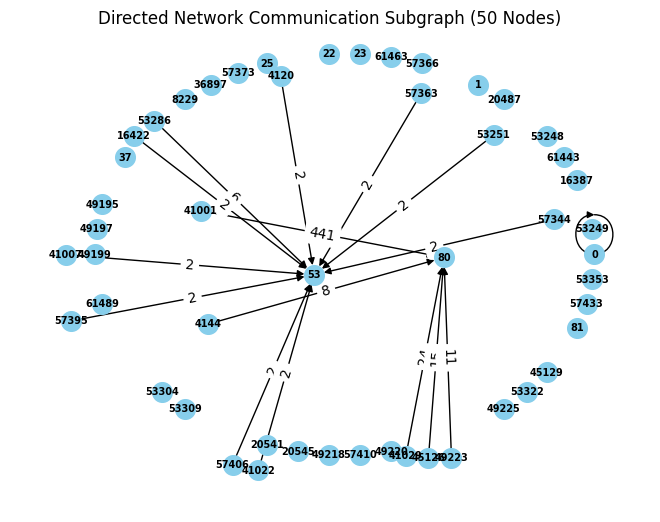

In [8]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
nodes = set(df2['Source Port']) | set(df2['NAT Source Port']) | set(df2['Destination Port']) | set(df2['NAT Destination Port'])

print("number of nodes : ",len(nodes))
G.add_nodes_from(nodes)

# Add edges
for _, row in df2.iterrows():
    src_port, dst_port, nat_src_port, nat_dst_port = row['Source Port'], row['Destination Port'], row['NAT Source Port'], row['NAT Destination Port']
    packets = row['Packets']

    # Adding edges between source and destination ports
    G.add_edge(src_port, dst_port, packets=packets)

    # Adding edges between NAT source and NAT destination ports
    G.add_edge(nat_src_port, nat_dst_port, packets=packets)

# Extract a subgraph with 100 nodes
subgraph_nodes = list(nodes)[:50]
subgraph = G.subgraph(subgraph_nodes)

# Use kamada_kawai_layout for a more evenly spaced layout
pos = nx.kamada_kawai_layout(subgraph)

# Draw the subgraph
nx.draw(subgraph, pos, with_labels=True, node_size=200, node_color='skyblue', font_size=7, font_color='black', font_weight='bold', arrowsize=10)

# Draw edge labels (packets)
edge_labels = nx.get_edge_attributes(subgraph, 'packets')
nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=edge_labels)

plt.title('Directed Network Communication Subgraph (50 Nodes)')
plt.show()


In [9]:


# Check if there is a directed edge from node 53306 to node 53309
if G.has_edge(53309,53304):
    print("Nodes 53306 and 53309 are connected.")
else:
    print("Nodes 53306 and 53309 are not connected.")


Nodes 53306 and 53309 are not connected.


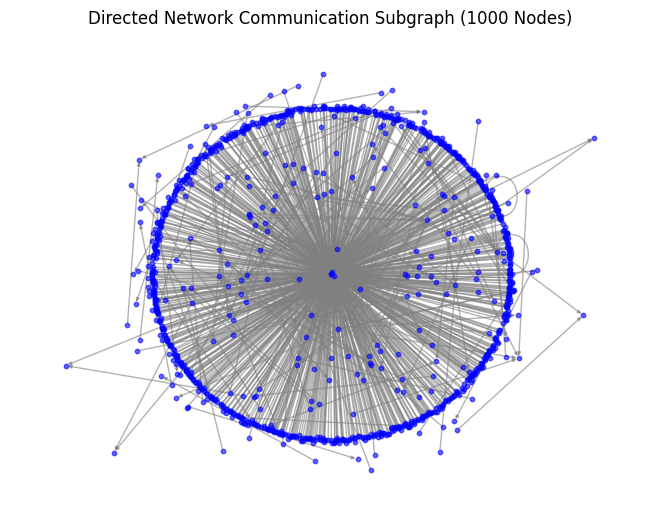

In [10]:

# Extract a subgraph with 1000 nodes
subgraph_nodes = list(nodes)[:1000]
subgraph = G.subgraph(subgraph_nodes)

# Use kamada_kawai_layout for a more evenly spaced layout
pos = nx.kamada_kawai_layout(subgraph)

# Draw the subgraph
nx.draw(subgraph, pos, with_labels=False, node_size=10, node_color='blue', alpha=0.6, edge_color='gray', arrowsize=5)


plt.title('Directed Network Communication Subgraph (1000 Nodes)')
plt.show()


# **Analysis**

**1. Average degree**

In [11]:
# Average Degree
avg_degree = sum(dict(G.degree()).values()) / len(G)
print(f"Average Degree: {avg_degree}")

Average Degree: 1.8472906403940887


**2. Degree distribution**

In [12]:

# Calculate network density
num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()

network_density = (2 * num_edges) / (num_nodes * (num_nodes - 1))

print(f"Network Density: {network_density}")


Network Density: 0.0011381950957449715


In [13]:
import networkx as nx
import matplotlib.pyplot as plt


# Calculate degree centralization
degree_centralization = nx.degree_centrality(G)
print("degree centralization",degree_centralization)


# Identify nodes with high degree centrality
high_degree_nodes = [node for node, centrality in degree_centralization.items() if centrality > 0.1]
print("high degree nodes",high_degree_nodes)




degree centralization {0: 0.0012322858903265558, 53249: 0.0006161429451632779, 57344: 0.0006161429451632779, 16387: 0.0018484288354898336, 61443: 0.0006161429451632779, 53248: 0.0006161429451632779, 53251: 0.0006161429451632779, 20487: 0.0006161429451632779, 1: 0.0012322858903265558, 57363: 0.0006161429451632779, 57366: 0.0006161429451632779, 22: 0.0012322858903265558, 4120: 0.0006161429451632779, 61463: 0.0006161429451632779, 23: 0.0030807147258163897, 25: 0.0006161429451632779, 57373: 0.0006161429451632779, 36897: 0.0006161429451632779, 8229: 0.0006161429451632779, 53286: 0.0006161429451632779, 16422: 0.0006161429451632779, 37: 0.0006161429451632779, 41001: 0.0006161429451632779, 49195: 0.0006161429451632779, 49197: 0.0006161429451632779, 49199: 0.0006161429451632779, 41007: 0.0006161429451632779, 61489: 0.0006161429451632779, 4144: 0.0006161429451632779, 57395: 0.0006161429451632779, 53: 0.2914356130622304, 53304: 0.0006161429451632779, 53309: 0.0006161429451632779, 57406: 0.0006161

1624
nodes and their degrees {0: 2, 53249: 1, 57344: 1, 16387: 3, 61443: 1, 53248: 1, 53251: 1, 20487: 1, 1: 2, 57363: 1, 57366: 1, 22: 2, 4120: 1, 61463: 1, 23: 5, 25: 1, 57373: 1, 36897: 1, 8229: 1, 53286: 1, 16422: 1, 37: 1, 41001: 1, 49195: 1, 49197: 1, 49199: 1, 41007: 1, 61489: 1, 4144: 1, 57395: 1, 53: 473, 53304: 1, 53309: 1, 57406: 1, 41022: 1, 20541: 1, 20545: 2, 49218: 1, 57410: 1, 49220: 1, 41029: 1, 45126: 1, 49223: 1, 49225: 1, 53322: 1, 45129: 1, 80: 114, 81: 1, 57433: 1, 53353: 1, 53356: 1, 57452: 1, 49262: 1, 49263: 1, 49266: 1, 49269: 1, 123: 5, 49277: 1, 57470: 9, 49278: 1, 45183: 1, 20611: 1, 49286: 1, 49288: 1, 53385: 1, 32905: 1, 61580: 1, 49294: 2, 61583: 1, 37008: 1, 53392: 1, 37011: 1, 49301: 1, 49304: 1, 53404: 1, 57504: 1, 61600: 1, 49315: 1, 53412: 1, 4269: 1, 49326: 1, 49328: 1, 16562: 1, 49332: 1, 16564: 1, 49334: 1, 4278: 1, 49342: 1, 12479: 1, 53442: 1, 49349: 1, 32971: 1, 61643: 1, 41170: 1, 16597: 1, 49367: 1, 53467: 1, 53470: 1, 61667: 1, 12522: 1, 37

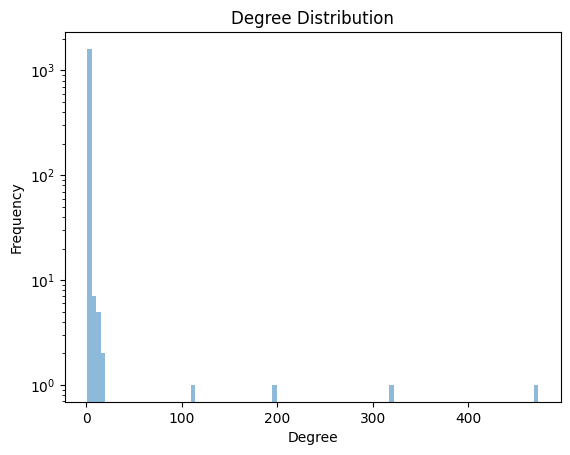

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

# Calculate the degree of each node
degrees = dict(G.degree())
print(len(degrees.keys()))
print("nodes and their degrees",degrees)
# Plot the degree distribution
plt.hist(list(degrees.values()), bins=100, alpha=0.5,log=True)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()


In [15]:
# Sort nodes based on their degree in descending order
sorted_degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)

# Extract the sorted nodes and their degrees
print(sorted_degrees)
print("highest degree node",sorted_degrees[0][0]," its degree :",sorted_degrees[0][1])

[(53, 473), (443, 318), (445, 197), (80, 114), (25174, 18), (64147, 16), (50584, 14), (44847, 12), (37965, 11), (22114, 11), (26467, 11), (6881, 10), (57470, 9), (27005, 9), (51505, 8), (5222, 6), (5228, 6), (27015, 6), (23, 5), (123, 5), (48817, 5), (49418, 4), (50265, 4), (62582, 4), (27017, 4), (35440, 4), (2710, 4), (56205, 4), (16387, 3), (21247, 3), (37807, 3), (993, 3), (17572, 3), (30188, 3), (51221, 3), (3389, 3), (0, 2), (1, 2), (22, 2), (20545, 2), (49294, 2), (16654, 2), (33038, 2), (33058, 2), (12637, 2), (57750, 2), (29104, 2), (25067, 2), (57866, 2), (57868, 2), (49845, 2), (17089, 2), (29384, 2), (8999, 2), (49991, 2), (62348, 2), (45964, 2), (29587, 2), (46081, 2), (42053, 2), (1202, 2), (9407, 2), (50393, 2), (25826, 2), (1305, 2), (42298, 2), (9587, 2), (1433, 2), (54741, 2), (54777, 2), (1564, 2), (26258, 2), (55060, 2), (47013, 2), (38904, 2), (55298, 2), (18468, 2), (55415, 2), (51322, 2), (2297, 2), (31000, 2), (27011, 2), (27014, 2), (27016, 2), (27019, 2), (270

**3. Path length**

In [16]:

# Shortest Path Length
shortest_path_length = nx.shortest_path_length(G)

# Flatten the lengths into a list of tuples (source, target, length)
all_shortest_paths = [(source, target, length) for source, lengths in shortest_path_length for target, length in lengths.items()]

path_lengths = [length for _, _, length in all_shortest_paths]

# Sort the list of lengths in ascending order
sorted_lengths = sorted(path_lengths)

# Print the shortest path length
shortest_path_length_set = set(sorted_lengths)
shortest_path_length=list(shortest_path_length_set)[1]
print(f"Shortest Path Length: {shortest_path_length}")

# Print all nodes that have the shortest path length
nodes_with_shortest_path = [(source, target) for source, target, length in all_shortest_paths if length == shortest_path_length]
print(f"Nodes with Shortest Path Length ({shortest_path_length}):")
for source, target in nodes_with_shortest_path:
    print(f"Shortest path from Node {source} to Node {target}")

Shortest Path Length: 1
Nodes with Shortest Path Length (1):
Shortest path from Node 53249 to Node 443
Shortest path from Node 57344 to Node 53
Shortest path from Node 16387 to Node 3655
Shortest path from Node 16387 to Node 16862
Shortest path from Node 16387 to Node 44427
Shortest path from Node 61443 to Node 445
Shortest path from Node 53248 to Node 443
Shortest path from Node 53251 to Node 53
Shortest path from Node 20487 to Node 50584
Shortest path from Node 57363 to Node 53
Shortest path from Node 57366 to Node 445
Shortest path from Node 4120 to Node 53
Shortest path from Node 57373 to Node 445
Shortest path from Node 36897 to Node 443
Shortest path from Node 8229 to Node 22114
Shortest path from Node 53286 to Node 53
Shortest path from Node 16422 to Node 53
Shortest path from Node 41001 to Node 80
Shortest path from Node 49195 to Node 445
Shortest path from Node 49197 to Node 2710
Shortest path from Node 49199 to Node 445
Shortest path from Node 41007 to Node 53
Shortest path f

In [17]:

filtered_paths = [(source, target, length) for source, target, length in all_shortest_paths if length > 0]

if not filtered_paths:
    print("No paths with length > 0 found.")
    exit()

# Calculate average path length
average_path_length = sum(length for _, _, length in filtered_paths) / len(filtered_paths)

# Print the average path length
print(f"Average Path Length: {average_path_length}")



Average Path Length: 1.486241727621038


In [18]:


# Diameter --- throws an error

# diameter = nx.diameter(G)
# print(f"Diameter: {diameter}")


**5. Clustering Coefficient**

In [19]:
# Clustering Coefficient
clustering_coefficient = nx.clustering(G)
avg_clustering_coefficient = nx.average_clustering(G)
print(f"Clustering Coefficient: {clustering_coefficient}")
print(f"Average Clustering Coefficient: {avg_clustering_coefficient}")

Clustering Coefficient: {0: 0, 53249: 0, 57344: 0, 16387: 0, 61443: 0, 53248: 0, 53251: 0, 20487: 0, 1: 0, 57363: 0, 57366: 0, 22: 0, 4120: 0, 61463: 0, 23: 0, 25: 0, 57373: 0, 36897: 0, 8229: 0, 53286: 0, 16422: 0, 37: 0, 41001: 0, 49195: 0, 49197: 0, 49199: 0, 41007: 0, 61489: 0, 4144: 0, 57395: 0, 53: 0, 53304: 0, 53309: 0, 57406: 0, 41022: 0, 20541: 0, 20545: 0, 49218: 0, 57410: 0, 49220: 0, 41029: 0, 45126: 0, 49223: 0, 49225: 0, 53322: 0, 45129: 0, 80: 0, 81: 0, 57433: 0, 53353: 0, 53356: 0, 57452: 0, 49262: 0, 49263: 0, 49266: 0, 49269: 0, 123: 0, 49277: 0, 57470: 0, 49278: 0, 45183: 0, 20611: 0, 49286: 0, 49288: 0, 53385: 0, 32905: 0, 61580: 0, 49294: 0, 61583: 0, 37008: 0, 53392: 0, 37011: 0, 49301: 0, 49304: 0, 53404: 0, 57504: 0, 61600: 0, 49315: 0, 53412: 0, 4269: 0, 49326: 0, 49328: 0, 16562: 0, 49332: 0, 16564: 0, 49334: 0, 4278: 0, 49342: 0, 12479: 0, 53442: 0, 49349: 0, 32971: 0, 61643: 0, 41170: 0, 16597: 0, 49367: 0, 53467: 0, 53470: 0, 61667: 0, 12522: 0, 37106: 0, 5

**6. Strongly connected components**

In [20]:
# Number of Strongly Connected Components (SCC)
scc = list(nx.strongly_connected_components(G))
num_scc = len(scc)
print(f"Number of Strongly Connected Components: {num_scc}")

Number of Strongly Connected Components: 1624


**7. Weakly connected components**

In [21]:
# Number of Weakly Connected Components (WCC)
wcc = list(nx.weakly_connected_components(G))
num_wcc = len(wcc)
print(f"Number of Weakly Connected Components: {num_wcc}")


Number of Weakly Connected Components: 134


**8. Giant component coverage**

In [22]:

# Giant Component
giant_component = max(nx.weakly_connected_components(G), key=len)
coverage = len(giant_component) / len(G)
print(f"Giant Component Coverage: {coverage}")

Giant Component Coverage: 0.7038177339901478


**9. Giant component properties- shortest path, average path length, diameter Avg CC**

In [27]:

# Giant Component Properties
giant_component_graph = G.subgraph(giant_component)



In [33]:
# Shortest Path in Giant Component
shortest_path_length_giant = nx.shortest_path_length(giant_component_graph)



# Flatten the lengths into a list of tuples (source, target, length)
all_shortest_paths = [(source, target, length) for source, lengths in shortest_path_length_giant for target, length in lengths.items()]

path_lengths = [length for _, _, length in all_shortest_paths]

# Sort the list of lengths in ascending order
sorted_lengths = sorted(path_lengths)

# Print the shortest path length
shortest_path_length_set = set(sorted_lengths)
shortest_path_length=list(shortest_path_length_set)[1]
print(f"Shortest Path Length in giant component : {shortest_path_length}")

# Print all nodes that have the shortest path length
nodes_with_shortest_path = [(source, target) for source, target, length in all_shortest_paths if length == shortest_path_length]
print(f"Nodes with Shortest Path Length ({shortest_path_length}):")
for source, target in nodes_with_shortest_path:
    print(f"Shortest path from Node {source} to Node {target}")


Shortest Path Length in giant component : 1
Nodes with Shortest Path Length (1):
Shortest path from Node 53249 to Node 443
Shortest path from Node 57344 to Node 53
Shortest path from Node 61443 to Node 445
Shortest path from Node 53248 to Node 443
Shortest path from Node 53251 to Node 53
Shortest path from Node 20487 to Node 50584
Shortest path from Node 57363 to Node 53
Shortest path from Node 57366 to Node 445
Shortest path from Node 4120 to Node 53
Shortest path from Node 57373 to Node 445
Shortest path from Node 36897 to Node 443
Shortest path from Node 53286 to Node 53
Shortest path from Node 16422 to Node 53
Shortest path from Node 41001 to Node 80
Shortest path from Node 49195 to Node 445
Shortest path from Node 49199 to Node 445
Shortest path from Node 41007 to Node 53
Shortest path from Node 61489 to Node 443
Shortest path from Node 4144 to Node 80
Shortest path from Node 57395 to Node 53
Shortest path from Node 53304 to Node 445
Shortest path from Node 53309 to Node 445
Short

In [32]:

filtered_paths = [(source, target, length) for source, target, length in all_shortest_paths if length > 0]

if not filtered_paths:
    print("No paths with length > 0 found.")
    exit()

# Calculate average path length
average_path_length = sum(length for _, _, length in filtered_paths) / len(filtered_paths)

# Print the average path length
print(f"Average Path Length in giant component : {average_path_length}")



Average Path Length in giant component : 1.5457476823861347


In [34]:
# Clustering Coefficient
clustering_coefficient = nx.clustering(giant_component_graph)
avg_clustering_coefficient = nx.average_clustering(giant_component_graph)
print(f"Clustering Coefficient in giant component graph: {clustering_coefficient}")
print(f"Average Clustering Coefficient in giant component graph: {avg_clustering_coefficient}")

Clustering Coefficient in giant component graph: {53249: 0, 57344: 0, 61443: 0, 53248: 0, 53251: 0, 20487: 0, 57363: 0, 57366: 0, 4120: 0, 57373: 0, 36897: 0, 53286: 0, 16422: 0, 41001: 0, 49195: 0, 49199: 0, 41007: 0, 61489: 0, 4144: 0, 57395: 0, 53: 0, 53304: 0, 53309: 0, 57406: 0, 41022: 0, 49218: 0, 57410: 0, 41029: 0, 45126: 0, 49223: 0, 49225: 0, 53322: 0, 80: 0, 53356: 0, 49262: 0, 49263: 0, 49266: 0, 49269: 0, 49277: 0, 49278: 0, 45183: 0, 20611: 0, 49286: 0, 49288: 0, 53385: 0, 32905: 0, 61580: 0, 61583: 0, 49301: 0, 49304: 0, 53404: 0, 57504: 0, 61600: 0, 49315: 0, 53412: 0, 49326: 0, 49328: 0, 16562: 0, 49332: 0, 49334: 0, 4278: 0, 49342: 0, 53442: 0, 49349: 0, 32971: 0, 61643: 0, 41170: 0, 16597: 0, 49367: 0, 53467: 0, 53470: 0, 61667: 0, 37106: 0, 57588: 0, 28923: 0, 49408: 0, 53504: 0, 33028: 0, 16648: 0, 57613: 0, 16654: 0, 57614: 0, 61712: 0, 49424: 0, 37134: 0, 49428: 0, 20768: 0, 53537: 0, 57634: 0, 57636: 0, 49445: 0, 45352: 0, 24873: 0, 33069: 0, 53550: 0, 49456: 0,

**10. k-connectedness -- analysis w.r.t. the value of k**

In [ ]:

G_undirected = G.to_undirected()

# k-connectedness (Analyze for different values of 'k')
for k in range(1, 10):
    is_k_connected = nx.is_k_edge_connected(G_undirected, k)
    print(f"Is {k}-Connected: {is_k_connected}")